In [ ]:
!pip install geemap

In [ ]:
import ee
import geemap
from google.colab import auth

In [ ]:
auth.authenticate_user()
ee.Initialize(project='ee-yourproject')

### Oregon

In [ ]:
# USFS treemap dataset
dataset = ee.ImageCollection('USFS/GTAC/TreeMap/v2016')

# 2016
tm2016 = dataset.filterDate('2016', '2017').first()

# US states
states = ee.FeatureCollection('TIGER/2018/States')

In [ ]:
oregon = states.filter(ee.Filter.eq('NAME', 'Oregon'))

In [ ]:
# field data
fldtypcd = tm2016.select('FLDTYPCD')

In [ ]:
def raster_to_vector(image):
    return image.reduceToVectors(
        reducer=ee.Reducer.countEvery(),  # Use a valid Reducer
        geometryType='polygon',
        scale=750,  # Set scale (750m)
        maxPixels=1e13,
        bestEffort=True,
        eightConnected=True
    )

In [ ]:
# Clip
oregon_treemap = fldtypcd.clip(oregon.geometry())

In [ ]:
print(type(oregon_treemap))

<class 'ee.image.Image'>


In [ ]:
# Convert
vectorized = raster_to_vector(oregon_treemap)

In [ ]:
# Export to Drive
task = ee.batch.Export.table.toDrive(
    collection=vectorized,
    description='Oregon_treemap',
    folder='USFS_treemap',
    fileFormat='SHP'
)
task.start()

print("Export started.")

Export started.


### Species

In [ ]:
treemap = gpd.read_file('/content/drive/MyDrive/USFS_treemap/Oregon_treemap.shp')

In [ ]:
treemap.head(3)

,count,label,geometry
0,1,941,"POLYGON ((-124.43253 42.49918, -124.42375 42.5..."
1,1,941,"POLYGON ((-124.38659 42.39019, -124.37783 42.3..."
2,1,941,"POLYGON ((-124.38120 42.37737, -124.37244 42.3..."


In [ ]:
field_type = {
    101: "Jack pine",
    102: "Red pine",
    103: "Eastern white pine",
    104: "Eastern white pine / eastern hemlock",
    105: "Eastern hemlock",
    121: "Balsam fir",
    122: "White spruce",
    123: "Red spruce",
    124: "Red spruce / balsam fir",
    125: "Black spruce",
    126: "Tamarack",
    127: "Northern white-cedar",
    128: "Fraser fir",
    141: "Longleaf pine",
    142: "Slash pine",
    161: "Loblolly pine",
    162: "Shortleaf pine",
    163: "Virginia pine",
    164: "Sand pine",
    165: "Table Mountain pine",
    166: "Pond pine",
    167: "Pitch pine",
    171: "Eastern redcedar",
    182: "Rocky Mountain juniper",
    184: "Juniper woodland",
    185: "Pinyon / juniper woodland",
    201: "Douglas-fir",
    202: "Port-Orford-cedar",
    221: "Ponderosa pine",
    222: "Incense-cedar",
    224: "Sugar pine",
    225: "Jeffrey pine",
    226: "Coulter pine",
    241: "Western white pine",
    261: "White fir",
    262: "Red fir",
    263: "Noble fir",
    264: "Pacific silver fir",
    265: "Engelmann spruce",
    266: "Engelmann spruce / subalpine fir",
    267: "Grand fir",
    268: "Subalpine fir",
    269: "Blue spruce",
    270: "Mountain hemlock",
    271: "Alaska-yellow-cedar",
    281: "Lodgepole pine",
    301: "Western hemlock",
    304: "Western redcedar",
    305: "Sitka spruce",
    321: "Western larch",
    341: "Redwood",
    361: "Knobcone pine",
    362: "Southwestern white pine",
    365: "Foxtail pine / bristlecone pine",
    366: "Limber pine",
    367: "Whitebark pine",
    368: "Miscellaneous western softwoods",
    369: "Western juniper",
    371: "California mixed conifer",
    381: "Scotch pine",
    383: "Other exotic softwoods",
    384: "Norway spruce",
    385: "Introduced larch",
    401: "Eastern white pine / northern red oak / white ash",
    402: "Eastern redcedar / hardwood",
    403: "Longleaf pine / oak",
    404: "Shortleaf pine / oak",
    405: "Virginia pine / southern red oak",
    406: "Loblolly pine / hardwood",
    407: "Slash pine / hardwood",
    409: "Other pine / hardwood",
    501: "Post oak / blackjack oak",
    502: "Chestnut oak",
    503: "White oak / red oak / hickory",
    504: "White oak",
    505: "Northern red oak",
    506: "Yellow-poplar / white oak / northern red oak",
    507: "Sassafras / persimmon",
    508: "Sweetgum / yellow-poplar",
    509: "Bur oak",
    510: "Scarlet oak",
    511: "Yellow-poplar",
    512: "Black walnut",
    513: "Black locust",
    514: "Southern scrub oak",
    515: "Chestnut oak / black oak / scarlet oak",
    516: "Cherry / white ash / yellow-poplar",
    517: "Elm / ash / black locust",
    519: "Red maple / oak",
    520: "Mixed upland hardwoods",
    601: "Swamp chestnut oak / cherrybark oak",
    602: "Sweetgum / Nuttall oak / willow oak",
    605: "Overcup oak / water hickory",
    606: "Atlantic white-cedar",
    607: "Baldcypress / water tupelo",
    608: "Sweetbay / swamp tupelo / red maple",
    609: "Baldcypress / pondcypress",
    701: "Black ash / American elm / red maple",
    702: "River birch / sycamore",
    703: "Cottonwood",
    704: "Willow",
    705: "Sycamore / pecan / American elm",
    706: "Sugarberry / hackberry / elm / green ash",
    707: "Silver maple / American elm",
    708: "Red maple / lowland",
    709: "Cottonwood / willow",
    722: "Oregon ash",
    801: "Sugar maple / beech / yellow birch",
    802: "Black cherry",
    805: "Hard maple / basswood",
    809: "Red maple / upland",
    901: "Aspen",
    902: "Paper birch",
    903: "Gray birch",
    904: "Balsam poplar",
    905: "Pin cherry",
    911: "Red alder",
    912: "Bigleaf maple",
    921: "Gray pine",
    922: "California black oak",
    923: "Oregon white oak",
    924: "Blue oak",
    931: "Coast live oak",
    933: "Canyon live oak",
    934: "Interior live oak",
    935: "California white oak (valley oak)",
    941: "Tanoak",
    942: "California laurel",
    943: "Giant chinkapin",
    961: "Pacific madrone",
    962: "Other hardwoods",
    971: "Deciduous oak woodland",
    972: "Evergreen oak woodland",
    973: "Mesquite woodland",
    974: "Cercocarpus (mountain brush) woodland",
    975: "Intermountain maple woodland",
    976: "Miscellaneous woodland hardwoods",
    982: "Mangrove",
    983: "Palms",
    995: "Other exotic hardwoods"
}

treemap['label'] = treemap['label'].map(field_type)

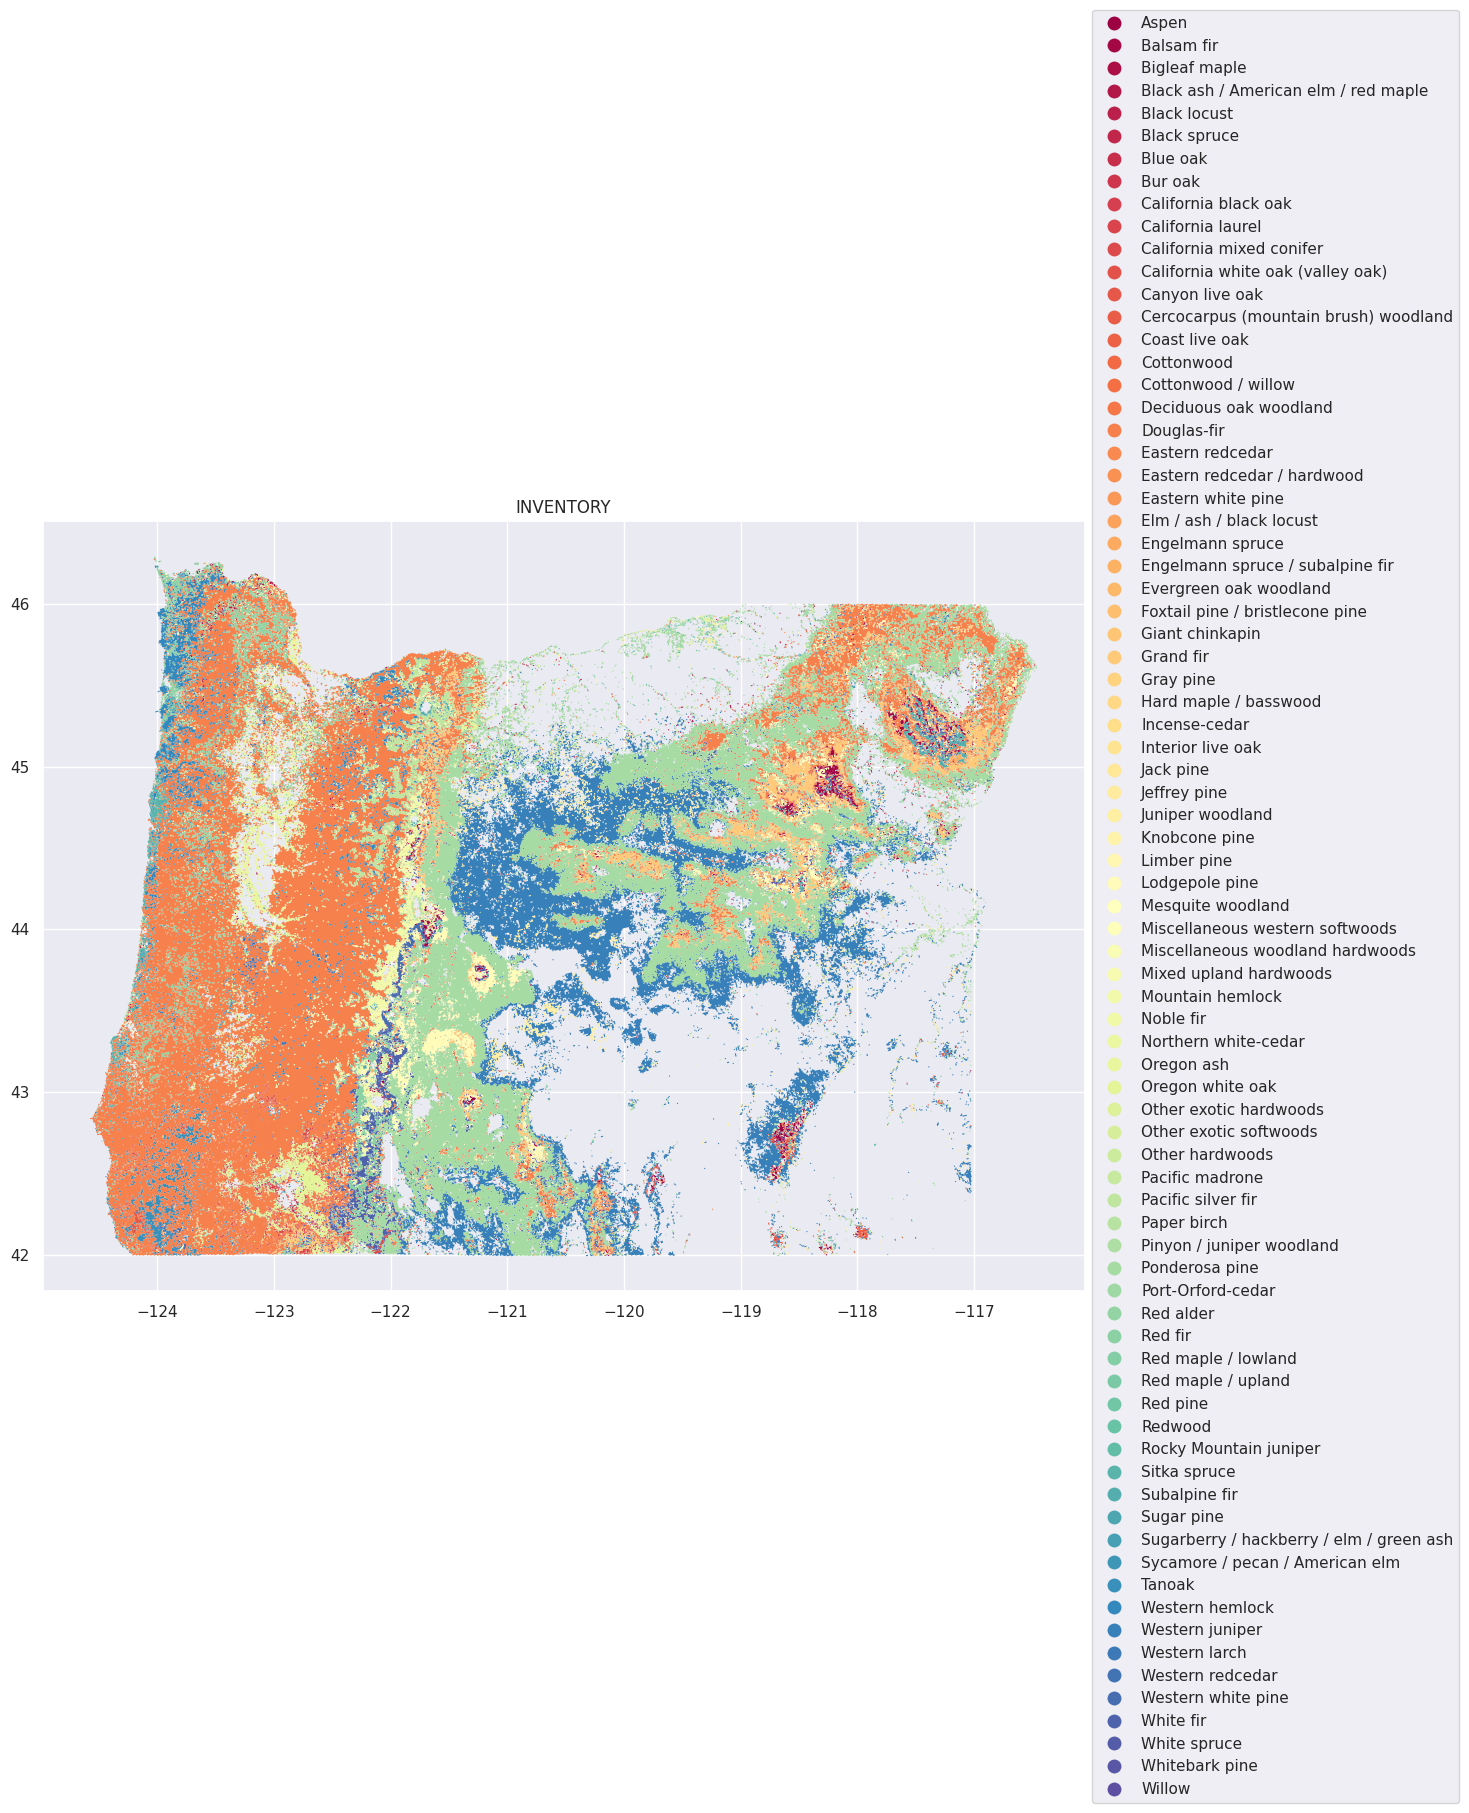

In [ ]:
cmap = 'Spectral'
fig, ax = plt.subplots(1, 1, figsize=(18, 10))
ax.set_title('INVENTORY')

treemap.plot(
    ax=ax,
    column='label',
    cmap=cmap,
    edgecolor='None',
    legend=True,
    legend_kwds={
        'ncol': 1,
        'loc': 'center left',
        'bbox_to_anchor': (1, 0.5)  # legend to the right
    }
)

plt.tight_layout()
plt.show()

In [ ]:
print(treemap['label'].value_counts())

label
Douglas-fir                                 3434
Ponderosa pine                              3093
Western juniper                             2627
Red alder                                   2314
Juniper woodland                            1965
Lodgepole pine                              1935
Grand fir                                   1819
Western hemlock                             1747
Oregon white oak                            1162
White fir                                   1017
Oregon ash                                  1010
Rocky Mountain juniper                       714
Cottonwood                                   677
Port-Orford-cedar                            662
Tanoak                                       641
Pinyon / juniper woodland                    566
Aspen                                        522
Pacific silver fir                           505
California mixed conifer                     487
Western redcedar                             473
Sitka spruce  